In [224]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.svm import SVR,SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta,datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# imports for database connection
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select

import time

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = None

In [225]:
engine = create_engine("sqlite:///../Resources/covid_db.db")

In [226]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [227]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [228]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [229]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [230]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [231]:
# View table column headers & rows - covid_stats
covid_stats_table = select('*').select_from(covid_stats)
covid_stats_result = session.execute(covid_stats_table).fetchall()
# print(covid_stats.__table__.columns.keys())
# print(covid_stats_result)

In [232]:
# View table column headers & rows - government_regulation
government_regulation_table = select('*').select_from(government_regulation)
government_regulation_result = session.execute(government_regulation_table).fetchall()
# print(government_regulation.__table__.columns.keys())
# print(government_regulation_result)

In [233]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [234]:
# preview 
df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,percentage_of_Pop_Total_Cases,total_deaths_updated,percentage_of_Pop_Total_Deaths,total_tests_updated,percentage_of_Pop_Total_Tests,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,0,0.000000e+00,0,0.000000,2,0.001873,0,0.000000,0,0.000000,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,2,0.001873,0,0.000000,0,0.000000,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,13,8.746595e-07,951,0.006398,6251,0.042058,179,0.001204,95721,0.644025,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,10,6.728150e-07,1551,0.010435,6292,0.042334,189,0.001272,97272,0.654461,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,6,4.036890e-07,0,0.000000,6388,0.042979,195,0.001312,97272,0.654461,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,1,6.728150e-08,0,0.000000,6406,0.043101,196,0.001319,97272,0.654461,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


In [235]:
df.columns

Index(['primary_key_reaction', 'date_updated', 'iso_code', 'continent',
       'location', 'population', 'population_density', 'median_age',
       'new_cases', 'percentage_of_Pop_New_Cases', 'new_deaths',
       'percentage_of_Pop_New_Deaths', 'new_tests',
       'percentage_of_Pop_New_Tests', 'total_cases_updated',
       'percentage_of_Pop_Total_Cases', 'total_deaths_updated',
       'percentage_of_Pop_Total_Deaths', 'total_tests_updated',
       'percentage_of_Pop_Total_Tests', 'primary_key_response',
       'StringencyIndex_updated', 'percentage_change_stringency',
       'StringencyLegacyIndex_updated', 'GovernmentResponseIndex_updated',
       'percentage_change_GovernmentResponse',
       'ContainmentHealthIndex_updated', 'percentage_change_ContainmentHealth',
       'EconomicSupportIndex_updated', 'percentage_change_EconomicSupport'],
      dtype='object')

In [236]:
future = ["30","45","60","75"]

iso_codes = df["iso_code"].unique()
iso_dicts = {}
for code in iso_codes:
    iso_dicts[code] = {}
    for day in future:
        date_col = "_".join(["date_updated",day])
        df_iso = df[df["iso_code"]==code][["date_updated","iso_code"]]
        df_iso[date_col] = pd.to_datetime(df_iso["date_updated"]) + timedelta(days=int(day))
        df_iso[date_col] = df_iso[date_col].astype(str)
        
        iso_dicts[code][day] = df_iso
            
    

In [237]:
iso_dicts["CAN"]["30"]

,date_updated,iso_code,date_updated_30
5099,2020-01-01,CAN,2020-01-31
5100,2020-01-02,CAN,2020-02-01
5101,2020-01-03,CAN,2020-02-02
5102,2020-01-04,CAN,2020-02-03
5103,2020-01-05,CAN,2020-02-04
5104,2020-01-06,CAN,2020-02-05
5105,2020-01-07,CAN,2020-02-06
5106,2020-01-08,CAN,2020-02-07
5107,2020-01-09,CAN,2020-02-08
5108,2020-01-10,CAN,2020-02-09


In [238]:
df["date_updated"]

0        2020-03-13
1        2020-03-19
2        2020-03-20
3        2020-03-21
4        2020-03-22
            ...    
32272    2020-08-27
32273    2020-08-28
32274    2020-08-29
32275    2020-08-30
32276    2020-08-31
Name: date_updated, Length: 32277, dtype: object

In [239]:
for day in future:
    cum_df = pd.DataFrame()
    for code in iso_codes:
        cum_df = cum_df.append(iso_dicts[code][day])


In [240]:
df[df["date_updated"]=="2020-03-15"]

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,percentage_of_Pop_Total_Cases,total_deaths_updated,percentage_of_Pop_Total_Deaths,total_tests_updated,percentage_of_Pop_Total_Tests,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
241,AFG2020-03-15,2020-03-15,AFG,Asia,Afghanistan,38928341,54.422,18.6,3,7.706468e-06,0,0.000000e+00,0,0.000000,10,2.568823e-05,0,0.000000e+00,0,0.000000,AFG2020-03-15,38.89,0.000000,48.81,33.33,0.000000,39.39,0.000000,0.0,0.0
580,ALB2020-03-15,2020-03-15,ALB,Europe,Albania,2877800,104.871,38.0,5,1.737438e-04,0,0.000000e+00,0,0.000000,38,1.320453e-03,1,3.474877e-05,0,0.000000,ALB2020-03-15,81.48,3.532402,88.10,62.82,3.152709,74.24,3.154092,0.0,0.0
824,ARE2020-03-15,2020-03-15,ARE,Asia,United Arab Emirates,9890400,112.442,34.0,1,1.011081e-05,0,0.000000e+00,6616,0.066893,86,8.695300e-04,0,0.000000e+00,90187,0.911864,ARE2020-03-15,34.26,0.000000,46.43,33.97,0.000000,40.15,0.000000,0.0,0.0
1027,ARG2020-03-15,2020-03-15,ARG,South America,Argentina,45195777,16.177,31.9,11,2.433856e-05,0,0.000000e+00,78,0.000173,45,9.956682e-05,2,4.425192e-06,408,0.000903,ARG2020-03-15,25.00,0.000000,30.95,27.56,0.000000,32.58,0.000000,0.0,0.0
1271,AUS2020-03-15,2020-03-15,AUS,Oceania,Australia,25499881,3.202,37.9,52,2.039225e-04,0,0.000000e+00,0,0.000000,249,9.764751e-04,3,1.176476e-05,0,0.000000,AUS2020-03-15,19.44,0.000000,25.00,25.64,0.000000,28.03,0.000000,12.5,0.0
1515,AUT2020-03-15,2020-03-15,AUT,Europe,Austria,9006400,106.749,44.4,151,1.676586e-03,0,0.000000e+00,700,0.007772,655,7.272606e-03,1,1.110322e-05,8167,0.090680,AUT2020-03-15,48.15,0.000000,65.48,39.74,0.000000,46.97,0.000000,0.0,0.0
1759,AZE2020-03-15,2020-03-15,AZE,Asia,Azerbaijan,10139175,119.309,32.4,6,5.917641e-05,0,0.000000e+00,0,0.000000,19,1.873920e-04,0,0.000000e+00,0,0.000000,AZE2020-03-15,52.78,0.000000,53.57,49.36,0.000000,58.33,0.000000,0.0,0.0
2156,BEL2020-03-15,2020-03-15,BEL,Europe,Belgium,11589616,375.564,41.8,179,1.544486e-03,5,4.314207e-07,1269,0.010949,1542,1.330501e-02,13,1.121694e-04,14412,0.124353,BEL2020-03-15,50.93,0.000000,67.86,51.28,0.000000,49.24,0.000000,62.5,0.0
2496,BFA2020-03-15,2020-03-15,BFA,Africa,Burkina Faso,20903278,70.151,17.6,1,4.783939e-06,0,0.000000e+00,0,0.000000,3,1.435182e-05,0,0.000000e+00,0,0.000000,BFA2020-03-15,11.11,0.000000,14.29,17.95,0.000000,21.21,0.000000,0.0,0.0
2677,BGD2020-03-15,2020-03-15,BGD,Asia,Bangladesh,164689383,1265.036,27.5,0,0.000000e+00,0,0.000000e+00,27,0.000016,3,1.821611e-06,0,0.000000e+00,268,0.000163,BGD2020-03-15,13.89,0.000000,17.86,18.59,0.000000,21.97,0.000000,0.0,0.0


In [241]:

days = []

for day in future:
    cum_df = pd.DataFrame()
    for code in iso_codes:
        cum_df = cum_df.append(iso_dicts[code][day])

    
    days.append(cum_df.reset_index(drop=True)) 
    
    
len(days)

4

In [242]:
for i,day in enumerate(future):
    days[i] = days[i].merge(df,left_on=["date_updated_" + day,"iso_code"],right_on=["date_updated","iso_code"],how="left",suffixes=["","_"+day])
    days[i] = days[i].reset_index(drop=True)
    date_i = days[i][["date_updated_" + day]]
    date_i = date_i.iloc[:,0]
    days[i].drop(columns=["date_updated_" + day],inplace=True)
    days[i]["date_updated_" + day] = date_i
    days[i] = days[i][["date_updated","iso_code","date_updated_" + day,"total_cases_updated","total_deaths_updated"]]
    days[i].rename(columns={"total_cases_updated":"total_cases_updated_" + day,
                        "total_deaths_updated":"total_deaths_updated_" + day},inplace=True)

In [243]:
days[0][days[0]["iso_code"]=="CAN"]

,date_updated,iso_code,date_updated_30,total_cases_updated_30,total_deaths_updated_30
5099,2020-01-01,CAN,2020-01-31,3.0,0.0
5100,2020-01-02,CAN,2020-02-01,4.0,0.0
5101,2020-01-03,CAN,2020-02-02,4.0,0.0
5102,2020-01-04,CAN,2020-02-03,4.0,0.0
5103,2020-01-05,CAN,2020-02-04,4.0,0.0
5104,2020-01-06,CAN,2020-02-05,5.0,0.0
5105,2020-01-07,CAN,2020-02-06,5.0,0.0
5106,2020-01-08,CAN,2020-02-07,7.0,0.0
5107,2020-01-09,CAN,2020-02-08,7.0,0.0
5108,2020-01-10,CAN,2020-02-09,7.0,0.0


In [244]:
cum_df[cum_df["iso_code"]=="CAN"]

,date_updated,iso_code,date_updated_75
5099,2020-01-01,CAN,2020-03-16
5100,2020-01-02,CAN,2020-03-17
5101,2020-01-03,CAN,2020-03-18
5102,2020-01-04,CAN,2020-03-19
5103,2020-01-05,CAN,2020-03-20
5104,2020-01-06,CAN,2020-03-21
5105,2020-01-07,CAN,2020-03-22
5106,2020-01-08,CAN,2020-03-23
5107,2020-01-09,CAN,2020-03-24
5108,2020-01-10,CAN,2020-03-25


for i in range(len(days)):
    days[i].drop(columns=['total_deaths_updated','total_cases_updated'],inplace=True)

In [245]:
days[0].head()

,date_updated,iso_code,date_updated_30,total_cases_updated_30,total_deaths_updated_30
0,2020-03-13,ABW,2020-04-12,92.0,0.0
1,2020-03-19,ABW,2020-04-18,96.0,2.0
2,2020-03-20,ABW,2020-04-19,96.0,2.0
3,2020-03-21,ABW,2020-04-20,97.0,2.0
4,2020-03-22,ABW,2020-04-21,97.0,2.0


In [246]:
final_df = df
for i in range(len(days)):
    suffix_right = "_" + str(i * 15 + 30)

    final_df = final_df.merge(days[i],on=["date_updated","iso_code"],how="left",suffixes=["",suffix_right]) # 
    

## DF New Deaths

In [247]:
def nn_ml(period,X_train_scaled,y_train_scaled, X_test_scaled,y_test_scaled,**layers):
    
    nn = Sequential()
    n_layers = layers["n_layers"]
    
    for layer in range(n_layers):
        if layer == 0:
            number_input_features = layers["number_input_features"]
        number_hidden_nodes = layers["l"+str(layer)]["number_hidden_nodes"]
        activation = layers["l"+str(layer)]["activation_function"]
        nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation=activation))

    nn.summary()

    # compile model
    nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

    # train model
    model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

    # Plot the train and test loss function
    plt.plot(model_1.history["loss"])
    plt.title(period + " Days - loss_function - 1 hidden layer")
    plt.legend(["loss"])
    plt.show()

    y_train_pred = nn.predict(X_train_scaled)
    y_test_pred = nn.predict(X_test_scaled)

    print(r2_score(y_train_scaled, y_train_pred))
    print(r2_score(y_test_scaled, y_test_pred))

In [248]:
def train_test(test_size,target,**layers):
    for n in ['30','45','60','75']:
        print(f"\n\n Training and predicting - {n} days ahead\n\n")

        total_deaths = "_".join(['total_deaths_updated',n])
        total_cases = "_".join(['total_cases_updated',n])
        df_n = final_df[['population', 'population_density', 'median_age', 'StringencyIndex_updated',\
                         "total_cases_updated", "total_deaths_updated", total_cases, total_deaths]]
        df_n.dropna(inplace=True)
        
        X_df = df_n.drop([total_cases,total_deaths],axis=1)
        print(f"X COLUMNS: {X_df.columns}")
        X = X_df.values
        
        if target == "deaths":
            y = df_n[total_deaths].values
        elif target == "cases":
            y = df_n[total_cases].values
            
        y = y.reshape(-1,1)

        # Split dataset into training and testing
        # train 95% of data, test 5%
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        # scale data
        X_scaler = StandardScaler()
        X_scaler.fit(X_train)

        y_scaler= StandardScaler()
        y_scaler.fit(y_train)

        y_train_scaled=y_scaler.transform(y_train)
        y_test_scaled=y_scaler.transform(y_test)

        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)

        nn_ml(period = n, X_train_scaled = X_train_scaled, 
              y_train_scaled = y_train_scaled, 
              X_test_scaled = X_test_scaled, 
              y_test_scaled = y_test_scaled, 
              **layers)



 Training and predicting - 30 days ahead




/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
813/813 [==============================] - 2s 3ms/step - loss: 0.6420 - mse: 0.6420
Epoch 2/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0812 - mse: 0.0812
Epoch 3/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0576 - mse: 0.0576
Epoch 4/100
813/813 [==============================] - 

813/813 [==============================] - 1s 2ms/step - loss: 0.0168 - mse: 0.0168
Epoch 78/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0165 - mse: 0.0165
Epoch 79/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0164 - mse: 0.0164
Epoch 80/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0163 - mse: 0.0163
Epoch 81/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0165 - mse: 0.0165
Epoch 82/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0161 - mse: 0.0161
Epoch 83/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0160 - mse: 0.0160
Epoch 84/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0162 - mse: 0.0162
Epoch 85/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0162 - mse: 0.0162
Epoch 86/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0164 - mse: 0.0164
Epoch 87/100
813/813 [=====================

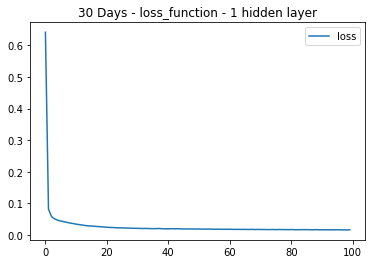

0.9843801558150143
0.991754210418769


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Epoch 1/100
740/740 [==============================] - 2s 2ms/step - loss: 0.3011 - mse: 0.3011
Epoch 2/100
740/740 [==============================] - 2s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 3/100
740/740 [==============================] - 2s 2ms/step - loss: 0.1134 - mse: 0.1134
Epoch 4/100
740/740 [==============================] - 1s 2ms/step - loss: 0.1060 - mse: 0.1060
Epoch 5/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0976 - mse: 0.0976
Epoch 6/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0913 - mse: 0.0913
Epoch 7/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0857 - mse: 0.0857
Epoch 8/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0814 - mse: 0.0814
Epoch 9/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0770 - mse: 0.0770
Epoch 10/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0743 - mse: 0.0743
Epoch 11/100
740/740 [=================

740/740 [==============================] - 1s 1ms/step - loss: 0.0347 - mse: 0.0347
Epoch 86/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0348 - mse: 0.0348
Epoch 87/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0342 - mse: 0.0342
Epoch 88/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0346 - mse: 0.0346
Epoch 89/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0343 - mse: 0.0343
Epoch 90/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0342 - mse: 0.0342
Epoch 91/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0343 - mse: 0.0343
Epoch 92/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0339 - mse: 0.0339
Epoch 93/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0340 - mse: 0.0340
Epoch 94/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0338 - mse: 0.0338
Epoch 95/100
740/740 [=====================

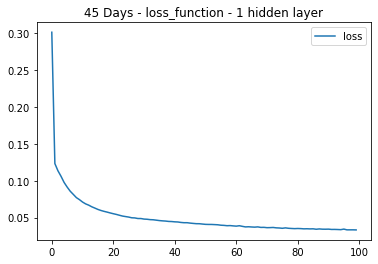

0.9662489557801314
0.9768205264420945


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 1s 2ms/step - loss: 0.3382 - mse: 0.3382
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1987 - mse: 0.1987
Epoch 3/100
668/668 [==============================] - 1s 1ms/step - loss: 0.1803 - mse: 0.1803
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1699 - mse: 0.1699
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1617 - mse: 0.1617
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1554 - mse: 0.1554
Epoch 7/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1494 - mse: 0.1494
Epoch 8/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1444 - mse: 0.1444
Epoch 9/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1393 - mse: 0.1393
Epoch 10/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1355 - mse: 0.1355
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 86/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 87/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 88/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.0868
Epoch 89/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0866 - mse: 0.0866
Epoch 90/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 91/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 92/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 93/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0855 - mse: 0.0855
Epoch 94/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0866 - mse: 0.0866
Epoch 95/100
668/668 [=====================

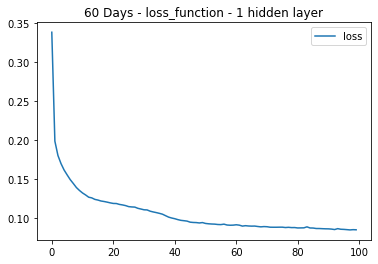

0.9162567761072553
0.9254838358647964


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 1s 2ms/step - loss: 0.5074 - mse: 0.5074
Epoch 2/100
595/595 [==============================] - 1s 2ms/step - loss: 0.3191 - mse: 0.3191
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2982 - mse: 0.2982
Epoch 4/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2759 - mse: 0.2759
Epoch 5/100
595/595 [==============================] - 1s 1ms/step - loss: 0.2588 - mse: 0.2588
Epoch 6/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2504 - mse: 0.2504
Epoch 7/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2412 - mse: 0.2412
Epoch 8/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2351 - mse: 0.2351
Epoch 9/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2276 - mse: 0.2276
Epoch 10/100
595/595 [==============================] - 1s 1ms/step - loss: 0.2216 - mse: 0.2216
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 1s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 87/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1238 - mse: 0.1238
Epoch 88/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 89/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 92/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 94/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1229 - mse: 0.1229
Epoch 95/100
595/595 [=====================

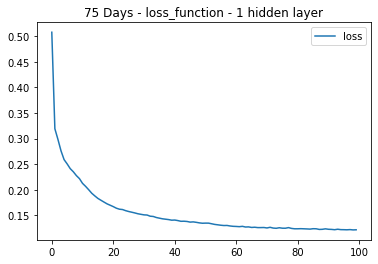

0.8801770147130716
0.8864469087651289


In [249]:
layers = { "number_input_features": 6,
      "n_layers": 2, 
      "l0":{"number_hidden_nodes":12,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":1,"activation_function":"linear"}
     }


train_test(test_size=0.05,target="deaths",**layers)

## Predicting Number of New Deaths- with NN Model


# Deep Neural Network



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 18)                126       
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 2s 2ms/step - loss: 0.2910 - mse: 0.2910
Epoch 2/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0446 - mse: 0.0446
Epoch 3/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0377 - mse: 0.0377
Epoch 4/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0337 - mse: 0.0337
Epoch 5/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0302 - mse: 0.0302
Epoch 6/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0270 - mse: 0.0270
Epoch 7/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0249 - mse: 0.0249
Epoch 8/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0232 - mse: 0.0232
Epoch 9/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0213 - mse: 0.0213
Epoch 10/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0191 - mse: 0.0191
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 2s 2ms/step - loss: 0.0057 - mse: 0.0057
Epoch 86/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0055 - mse: 0.0055
Epoch 87/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0058 - mse: 0.0058
Epoch 88/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0057 - mse: 0.0057
Epoch 89/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0056 - mse: 0.0056
Epoch 90/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0055 - mse: 0.0055
Epoch 91/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0060 - mse: 0.0060
Epoch 92/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0057 - mse: 0.0057
Epoch 93/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 94/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 95/100
813/813 [=====================

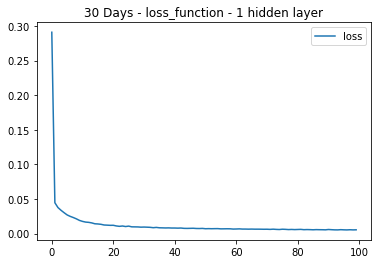

0.9949829356689233
0.9930010260231277


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_12 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 1s 2ms/step - loss: 0.1876 - mse: 0.1876
Epoch 2/100
740/740 [==============================] - 1s 2ms/step - loss: 0.1011 - mse: 0.1011
Epoch 3/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0826 - mse: 0.0826
Epoch 4/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0705 - mse: 0.0705
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0618 - mse: 0.0618
Epoch 6/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0559 - mse: 0.0559
Epoch 7/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0504 - mse: 0.0504
Epoch 8/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0468 - mse: 0.0468
Epoch 9/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0440 - mse: 0.0440
Epoch 10/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0413 - mse: 0.0413
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 1s 2ms/step - loss: 0.0195 - mse: 0.0195
Epoch 86/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0198 - mse: 0.0198
Epoch 87/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0202 - mse: 0.0202
Epoch 88/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0197 - mse: 0.0197
Epoch 89/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0192 - mse: 0.0192
Epoch 90/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0194 - mse: 0.0194
Epoch 91/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0195 - mse: 0.0195
Epoch 92/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0187 - mse: 0.0187
Epoch 93/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0191 - mse: 0.0191
Epoch 94/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0190 - mse: 0.0190
Epoch 95/100
740/740 [=====================

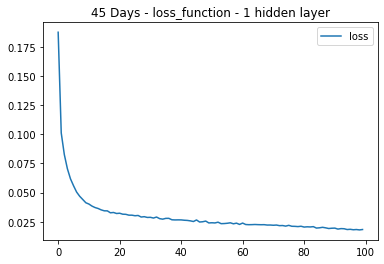

0.9828063735470531
0.9815264724283328


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_15 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 1s 2ms/step - loss: 0.3271 - mse: 0.3271
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1566 - mse: 0.1566
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1323 - mse: 0.1323
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0990 - mse: 0.0990
Epoch 6/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0856 - mse: 0.0856
Epoch 7/100
668/668 [==============================] - 3s 4ms/step - loss: 0.0759 - mse: 0.0759
Epoch 8/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0675 - mse: 0.0675
Epoch 9/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0625 - mse: 0.0625
Epoch 10/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0588 - mse: 0.0588
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 1s 2ms/step - loss: 0.0305 - mse: 0.0305
Epoch 86/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0314 - mse: 0.0314
Epoch 87/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0302 - mse: 0.0302
Epoch 88/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0298 - mse: 0.0298
Epoch 89/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0305 - mse: 0.0305
Epoch 90/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0298 - mse: 0.0298
Epoch 91/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0309 - mse: 0.0309
Epoch 92/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0298 - mse: 0.0298
Epoch 93/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0295 - mse: 0.0295
Epoch 94/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0289 - mse: 0.0289
Epoch 95/100
668/668 [=====================

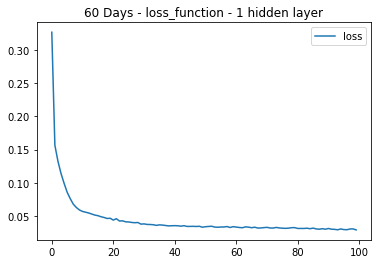

0.972075715755513
0.9486377785049852


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_18 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 1s 2ms/step - loss: 0.3270 - mse: 0.3270
Epoch 2/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2176 - mse: 0.2176
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1671 - mse: 0.1671
Epoch 4/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1373 - mse: 0.1373
Epoch 5/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1194 - mse: 0.1194
Epoch 6/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1057 - mse: 0.1057
Epoch 7/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 8/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 9/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0794 - mse: 0.0794
Epoch 10/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0737 - mse: 0.0737
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 1s 2ms/step - loss: 0.0168 - mse: 0.0168
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0184 - mse: 0.0184
Epoch 87/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0164 - mse: 0.0164
Epoch 88/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0188 - mse: 0.0188
Epoch 89/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0157 - mse: 0.0157
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0154 - mse: 0.0154
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0166 - mse: 0.0166
Epoch 92/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0158 - mse: 0.0158
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0157 - mse: 0.0157
Epoch 94/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0157 - mse: 0.0157
Epoch 95/100
595/595 [=====================

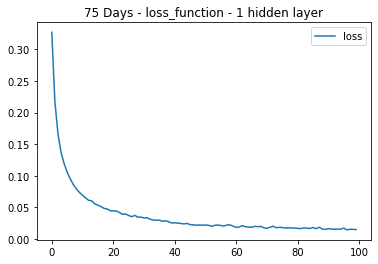

0.9871381723014431
0.9874553914028789


In [250]:
layers = { "number_input_features": 6,
      "n_layers": 3, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":1,"activation_function":"linear"}
     }

train_test(test_size=0.05,target="deaths",**layers)



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_21 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 2s 2ms/step - loss: 0.1096 - mse: 0.1096
Epoch 2/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0426 - mse: 0.0426
Epoch 3/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 4/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0318 - mse: 0.0318
Epoch 5/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0284 - mse: 0.0284
Epoch 6/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0255 - mse: 0.0255
Epoch 7/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0228 - mse: 0.0228
Epoch 8/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0206 - mse: 0.0206
Epoch 9/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0186 - mse: 0.0186
Epoch 10/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0162 - mse: 0.0162
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 2s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 86/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0064 - mse: 0.0064
Epoch 87/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 88/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0049 - mse: 0.0049
Epoch 89/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0056 - mse: 0.0056
Epoch 90/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0049 - mse: 0.0049
Epoch 91/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 92/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0052 - mse: 0.0052
Epoch 93/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0049 - mse: 0.0049
Epoch 94/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 95/100
813/813 [=====================

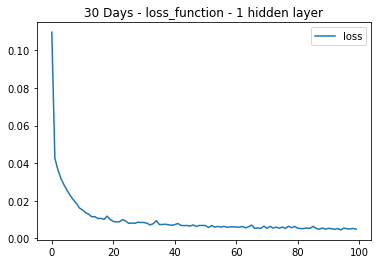

0.9957220836676965
0.9949592553122485


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_25 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
__________________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 2s 2ms/step - loss: 0.2302 - mse: 0.2302
Epoch 2/100
740/740 [==============================] - 2s 2ms/step - loss: 0.1100 - mse: 0.1100
Epoch 3/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0883 - mse: 0.0883
Epoch 4/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0711 - mse: 0.0711
Epoch 5/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0570 - mse: 0.0570
Epoch 6/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0491 - mse: 0.0491
Epoch 7/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0445 - mse: 0.0445
Epoch 8/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0416 - mse: 0.0416
Epoch 9/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0373 - mse: 0.0373
Epoch 10/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0339 - mse: 0.0339
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 2s 2ms/step - loss: 0.0067 - mse: 0.0067
Epoch 86/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0070 - mse: 0.0070
Epoch 87/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 88/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0070 - mse: 0.0070
Epoch 89/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0069 - mse: 0.0069
Epoch 90/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 91/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 92/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0069 - mse: 0.0069
Epoch 93/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0069 - mse: 0.0069
Epoch 94/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0069 - mse: 0.0069
Epoch 95/100
740/740 [=====================

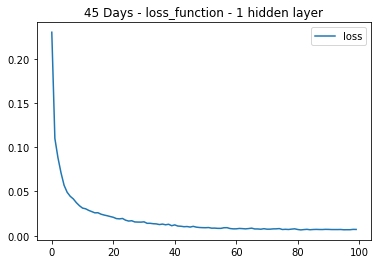

0.9943511528505368
0.9961425920514546


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_29 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 2s 2ms/step - loss: 0.3016 - mse: 0.3016
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1868 - mse: 0.1868
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1664 - mse: 0.1664
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1526 - mse: 0.1526
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1388 - mse: 0.1388
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 7/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0991 - mse: 0.0991
Epoch 8/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0865 - mse: 0.0865
Epoch 9/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0780 - mse: 0.0780
Epoch 10/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0726 - mse: 0.0726
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 1s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 86/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 87/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0158 - mse: 0.0158
Epoch 88/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0147 - mse: 0.0147
Epoch 89/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 90/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0140 - mse: 0.0140
Epoch 91/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 92/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0122 - mse: 0.0122
Epoch 93/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0145 - mse: 0.0145
Epoch 94/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 95/100
668/668 [=====================

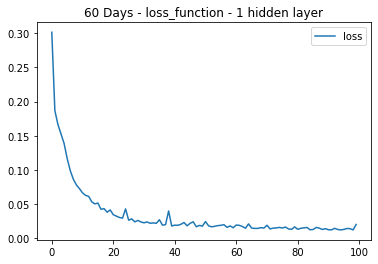

0.9861702945867115
0.9926038721610124


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_33 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 1s 2ms/step - loss: 0.3473 - mse: 0.3473
Epoch 2/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2066 - mse: 0.2066
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1537 - mse: 0.1537
Epoch 4/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1268 - mse: 0.1268
Epoch 5/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 6/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 7/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0995 - mse: 0.0995
Epoch 8/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 9/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 10/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0861 - mse: 0.0861
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 1s 2ms/step - loss: 0.0263 - mse: 0.0263
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0267 - mse: 0.0267
Epoch 87/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0264 - mse: 0.0264
Epoch 88/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0352 - mse: 0.0352
Epoch 89/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0234 - mse: 0.0234
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0229 - mse: 0.0229
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0232 - mse: 0.0232
Epoch 92/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0251 - mse: 0.0251
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0245 - mse: 0.0245
Epoch 94/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0238 - mse: 0.0238
Epoch 95/100
595/595 [=====================

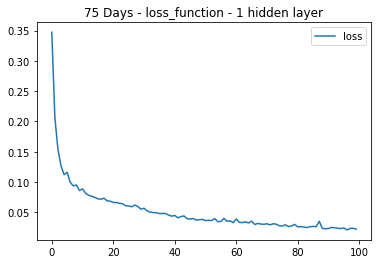

0.9813876798065947
0.9793482084341564


In [251]:
layers = { "number_input_features": 6,
      "n_layers": 4, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":4,"activation_function":"relu"},
      "l3":{"number_hidden_nodes":1,"activation_function":"linear"}
          
     }

train_test(test_size=0.05,target="deaths",**layers)

## Cases



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 1s 2ms/step - loss: 0.1487 - mse: 0.1487
Epoch 2/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0268 - mse: 0.0268
Epoch 3/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0241 - mse: 0.0241
Epoch 4/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0222 - mse: 0.0222
Epoch 5/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0196 - mse: 0.0196
Epoch 6/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0175 - mse: 0.0175
Epoch 7/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0169 - mse: 0.0169
Epoch 8/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 9/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0147 - mse: 0.0147
Epoch 10/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0141 - mse: 0.0141
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 1s 1ms/step - loss: 0.0068 - mse: 0.0068
Epoch 86/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 87/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 88/100
813/813 [==============================] - 1s 1ms/step - loss: 0.0067 - mse: 0.0067
Epoch 89/100
813/813 [==============================] - 1s 1ms/step - loss: 0.0067 - mse: 0.0067
Epoch 90/100
813/813 [==============================] - 1s 1ms/step - loss: 0.0066 - mse: 0.0066
Epoch 91/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 92/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0067 - mse: 0.0067
Epoch 93/100
813/813 [==============================] - 1s 1ms/step - loss: 0.0066 - mse: 0.0066
Epoch 94/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 95/100
813/813 [=====================

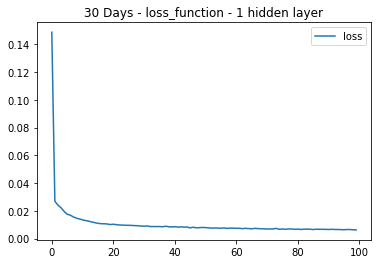

0.9939747207872995
0.9920102865479882


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 1s 1ms/step - loss: 0.5450 - mse: 0.5450
Epoch 2/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0915 - mse: 0.0915
Epoch 3/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0703 - mse: 0.0703
Epoch 4/100
740/740 [==============================] - 1s 1ms/step - loss: 0.0623 - mse: 0.0623
Epoch 5/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0579 - mse: 0.0579
Epoch 6/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0539 - mse: 0.0539
Epoch 7/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0521 - mse: 0.0521
Epoch 8/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0498 - mse: 0.0498
Epoch 9/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0473 - mse: 0.0473
Epoch 10/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0459 - mse: 0.0459
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 1s 2ms/step - loss: 0.0168 - mse: 0.0168
Epoch 86/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0171 - mse: 0.0171
Epoch 87/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0169 - mse: 0.0169
Epoch 88/100
740/740 [==============================] - 1s 1ms/step - loss: 0.0168 - mse: 0.0168
Epoch 89/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0170 - mse: 0.0170
Epoch 90/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0170 - mse: 0.0170
Epoch 91/100
740/740 [==============================] - 1s 1ms/step - loss: 0.0168 - mse: 0.0168
Epoch 92/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0162 - mse: 0.0162
Epoch 93/100
740/740 [==============================] - 1s 1ms/step - loss: 0.0167 - mse: 0.0167
Epoch 94/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0167 - mse: 0.0167
Epoch 95/100
740/740 [=====================

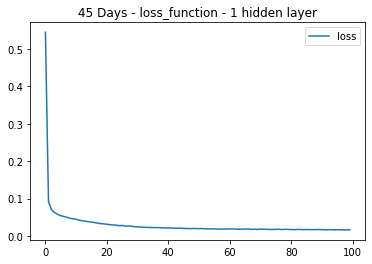

0.9843576066618491
0.988345480089145


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 1s 1ms/step - loss: 0.2026 - mse: 0.2026
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1264 - mse: 0.1264
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1108 - mse: 0.1108
Epoch 4/100
668/668 [==============================] - 1s 1ms/step - loss: 0.1032 - mse: 0.1032
Epoch 5/100
668/668 [==============================] - 1s 1ms/step - loss: 0.0963 - mse: 0.0963
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0903 - mse: 0.0903
Epoch 7/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 8/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0818 - mse: 0.0818
Epoch 9/100
668/668 [==============================] - 1s 1ms/step - loss: 0.0768 - mse: 0.0768
Epoch 10/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0702 - mse: 0.0702
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 1s 2ms/step - loss: 0.0308 - mse: 0.0308
Epoch 86/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0309 - mse: 0.0309
Epoch 87/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0305 - mse: 0.0305
Epoch 88/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0304 - mse: 0.0304
Epoch 89/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0304 - mse: 0.0304
Epoch 90/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0305 - mse: 0.0305
Epoch 91/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0304 - mse: 0.0304
Epoch 92/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0304 - mse: 0.0304
Epoch 93/100
668/668 [==============================] - 1s 1ms/step - loss: 0.0303 - mse: 0.0303
Epoch 94/100
668/668 [==============================] - 1s 1ms/step - loss: 0.0298 - mse: 0.0298
Epoch 95/100
668/668 [=====================

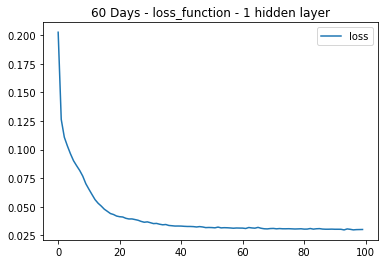

0.9709362926642697
0.9760220903867413


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 1s 2ms/step - loss: 0.7500 - mse: 0.7500
Epoch 2/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2252 - mse: 0.2252
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1978 - mse: 0.1978
Epoch 4/100
595/595 [==============================] - 3s 4ms/step - loss: 0.1863 - mse: 0.1863
Epoch 5/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1791 - mse: 0.1791
Epoch 6/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1695 - mse: 0.1695
Epoch 7/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1551 - mse: 0.1551
Epoch 8/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1449 - mse: 0.1449
Epoch 9/100
595/595 [==============================] - 1s 1ms/step - loss: 0.1361 - mse: 0.1361
Epoch 10/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1294 - mse: 0.1294
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 1s 2ms/step - loss: 0.0440 - mse: 0.0440
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0427 - mse: 0.0427
Epoch 87/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0428 - mse: 0.0428
Epoch 88/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0431 - mse: 0.0431
Epoch 89/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0420 - mse: 0.0420
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0429 - mse: 0.0429
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0425 - mse: 0.0425
Epoch 92/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0426 - mse: 0.0426
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0413 - mse: 0.0413
Epoch 94/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0423 - mse: 0.0423
Epoch 95/100
595/595 [=====================

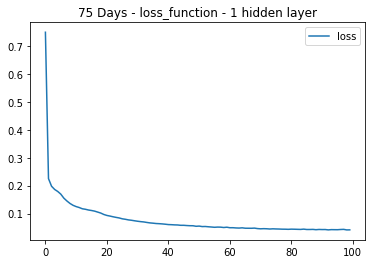

0.9580584830640096
0.9507853889485685


In [252]:
layers = { "number_input_features": 6,
      "n_layers": 2, 
      "l0":{"number_hidden_nodes":12,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":1,"activation_function":"linear"}
     }


train_test(test_size=0.05,target="cases",**layers)



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_45 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 2s 3ms/step - loss: 0.1670 - mse: 0.1670
Epoch 2/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0233 - mse: 0.0233
Epoch 3/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0185 - mse: 0.0185
Epoch 4/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0157 - mse: 0.0157
Epoch 5/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0145 - mse: 0.0145
Epoch 6/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0113 - mse: 0.0113
Epoch 7/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0110 - mse: 0.0110
Epoch 8/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0094 - mse: 0.0094
Epoch 9/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0086 - mse: 0.0086
Epoch 10/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0085 - mse: 0.0085
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 2s 2ms/step - loss: 0.0026 - mse: 0.0026
Epoch 86/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0025 - mse: 0.0025
Epoch 87/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 88/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0024 - mse: 0.0024
Epoch 89/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0026 - mse: 0.0026
Epoch 90/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0033 - mse: 0.0033
Epoch 91/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 92/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0025 - mse: 0.0025
Epoch 93/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 94/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0024 - mse: 0.0024
Epoch 95/100
813/813 [=====================

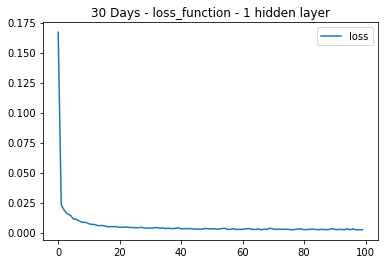

0.9973700293396557
0.9979422692660552


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_48 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 2s 2ms/step - loss: 0.4414 - mse: 0.4414
Epoch 2/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0653 - mse: 0.0653
Epoch 3/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0468 - mse: 0.0468
Epoch 4/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0381 - mse: 0.0381
Epoch 5/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0324 - mse: 0.0324
Epoch 6/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0270 - mse: 0.0270
Epoch 7/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0230 - mse: 0.0230
Epoch 8/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0221 - mse: 0.0221
Epoch 9/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0192 - mse: 0.0192
Epoch 10/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0177 - mse: 0.0177
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 2s 2ms/step - loss: 0.0059 - mse: 0.0059
Epoch 86/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 87/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0058 - mse: 0.0058
Epoch 88/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 89/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 90/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0056 - mse: 0.0056
Epoch 91/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0057 - mse: 0.0057
Epoch 92/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0052 - mse: 0.0052
Epoch 93/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0051 - mse: 0.0051
Epoch 94/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0057 - mse: 0.0057
Epoch 95/100
740/740 [=====================

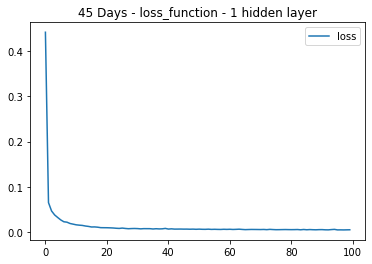

0.9938855445287729
0.9950524861103095


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_51 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 1s 2ms/step - loss: 0.3321 - mse: 0.3321
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0996 - mse: 0.0996
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0815 - mse: 0.0815
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0670 - mse: 0.0670
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0560 - mse: 0.0560
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0492 - mse: 0.0492
Epoch 7/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0446 - mse: 0.0446
Epoch 8/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0394 - mse: 0.0394
Epoch 9/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0363 - mse: 0.0363
Epoch 10/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0336 - mse: 0.0336
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 1s 2ms/step - loss: 0.0085 - mse: 0.0085
Epoch 86/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0090 - mse: 0.0090
Epoch 87/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 88/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0080 - mse: 0.0080
Epoch 89/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0074 - mse: 0.0074
Epoch 90/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0078 - mse: 0.0078
Epoch 91/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0075 - mse: 0.0075
Epoch 92/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0079 - mse: 0.0079
Epoch 93/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 94/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 95/100
668/668 [=====================

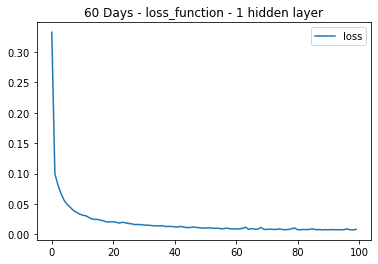

0.9923265606400186
0.9941396808608972


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_54 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 1s 2ms/step - loss: 0.4071 - mse: 0.4071
Epoch 2/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1776 - mse: 0.1776
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1532 - mse: 0.1532
Epoch 4/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1325 - mse: 0.1325
Epoch 5/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1115 - mse: 0.1115
Epoch 6/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 7/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0779 - mse: 0.0779
Epoch 8/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0692 - mse: 0.0692
Epoch 9/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0607 - mse: 0.0607
Epoch 10/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0573 - mse: 0.0573
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 1s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0180 - mse: 0.0180
Epoch 87/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173
Epoch 88/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0198 - mse: 0.0198
Epoch 89/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0161 - mse: 0.0161
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0174 - mse: 0.0174
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0163 - mse: 0.0163
Epoch 92/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0189 - mse: 0.0189
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0163 - mse: 0.0163
Epoch 94/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0167 - mse: 0.0167
Epoch 95/100
595/595 [=====================

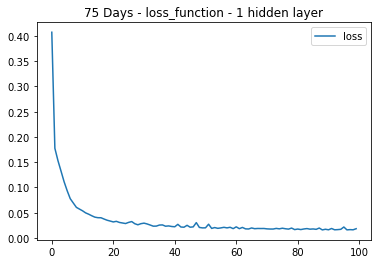

0.9825030226875708
0.9868067253127277


In [253]:
layers = { "number_input_features": 6,
      "n_layers": 3, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":1,"activation_function":"linear"}
     }

train_test(test_size=0.05,target="cases",**layers)



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_57 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 3s 3ms/step - loss: 0.2543 - mse: 0.2543
Epoch 2/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0164 - mse: 0.0164
Epoch 3/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0118 - mse: 0.0118
Epoch 4/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0102 - mse: 0.0102
Epoch 5/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 6/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 7/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0063 - mse: 0.0063
Epoch 8/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0060 - mse: 0.0060
Epoch 9/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0055 - mse: 0.0055
Epoch 10/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 2s 2ms/step - loss: 0.0021 - mse: 0.0021
Epoch 86/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 87/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0021 - mse: 0.0021
Epoch 88/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0021 - mse: 0.0021
Epoch 89/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 90/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 91/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0021 - mse: 0.0021
Epoch 92/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 93/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0026 - mse: 0.0026
Epoch 94/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 95/100
813/813 [=====================

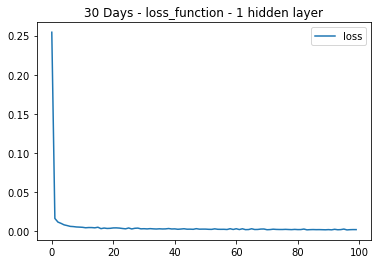

0.9976510019814263
0.9946925738702229


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_61 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_62 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 1s 2ms/step - loss: 0.6566 - mse: 0.6566
Epoch 2/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0510 - mse: 0.0510
Epoch 3/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0438 - mse: 0.0438
Epoch 4/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0384 - mse: 0.0384
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0364 - mse: 0.0364
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0334 - mse: 0.0334
Epoch 7/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 8/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0260 - mse: 0.0260
Epoch 9/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0251 - mse: 0.0251
Epoch 10/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0227 - mse: 0.0227
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 2s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 86/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0058 - mse: 0.0058
Epoch 87/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0052 - mse: 0.0052
Epoch 88/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 89/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0050 - mse: 0.0050
Epoch 90/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 91/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0045 - mse: 0.0045
Epoch 92/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0063 - mse: 0.0063
Epoch 93/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0051 - mse: 0.0051
Epoch 94/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 95/100
740/740 [=====================

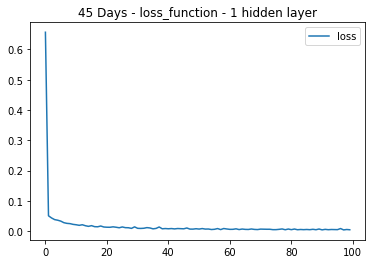

0.9946084791621761
0.9960895856533334


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_65 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_66 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Epoch 1/100
668/668 [==============================] - 2s 3ms/step - loss: 0.9131 - mse: 0.9131
Epoch 2/100
668/668 [==============================] - 2s 3ms/step - loss: 0.1661 - mse: 0.1661
Epoch 3/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0819 - mse: 0.0819
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0633 - mse: 0.0633
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0528 - mse: 0.0528
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0472 - mse: 0.0472
Epoch 7/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0422 - mse: 0.0422
Epoch 8/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0376 - mse: 0.0376
Epoch 9/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0350 - mse: 0.0350
Epoch 10/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0316 - mse: 0.0316
Epoch 11/100
668/668 [=================

668/668 [==============================] - 1s 2ms/step - loss: 0.0066 - mse: 0.0066
Epoch 86/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0067 - mse: 0.0067
Epoch 87/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0063 - mse: 0.0063
Epoch 88/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 89/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 90/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0059 - mse: 0.0059
Epoch 91/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0060 - mse: 0.0060
Epoch 92/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 93/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0061 - mse: 0.0061
Epoch 94/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0063 - mse: 0.0063
Epoch 95/100
668/668 [=====================

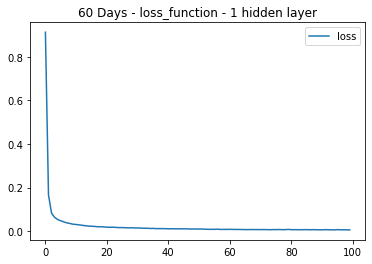

0.9942697614664402
0.9886308202377578


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_69 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 1s 2ms/step - loss: 0.6439 - mse: 0.6439
Epoch 2/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1849 - mse: 0.1849
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1257 - mse: 0.1257
Epoch 4/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0828 - mse: 0.0828
Epoch 5/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0610 - mse: 0.0610
Epoch 6/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0519 - mse: 0.0519
Epoch 7/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0413 - mse: 0.0413
Epoch 8/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0383 - mse: 0.0383
Epoch 9/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0359 - mse: 0.0359
Epoch 10/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0349 - mse: 0.0349
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 1s 2ms/step - loss: 0.0098 - mse: 0.0098
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0093 - mse: 0.0093
Epoch 87/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0093 - mse: 0.0093
Epoch 88/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0097 - mse: 0.0097
Epoch 89/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0090 - mse: 0.0090
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0093 - mse: 0.0093
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0089 - mse: 0.0089
Epoch 92/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0091 - mse: 0.0091
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0093 - mse: 0.0093
Epoch 94/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0091 - mse: 0.0091
Epoch 95/100
595/595 [=====================

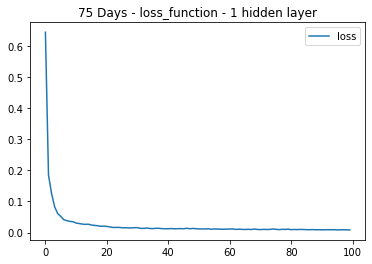

0.9917386791389166
0.9894391501421583


In [254]:
layers = { "number_input_features": 6,
      "n_layers": 4, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":4,"activation_function":"relu"},
      "l3":{"number_hidden_nodes":1,"activation_function":"linear"}
          
     }

train_test(test_size=0.05,target="cases",**layers)

In [255]:
final_df.to_csv("final_df.csv")